In [2]:
from qiskit import *
from qiskit.visualization import plot_histogram
import numpy as np

In [3]:
def AddHGateToAllQubits(quantumCircuit,numberOfQubits):
    for qubit in range(numberOfQubits):
        quantumCircuit.h(qubit)

In [4]:
def AddXGateToAllQubits(quantumCircuit,numberOfQubits):
    for qubit in range(numberOfQubits):
        quantumCircuit.x(qubit)

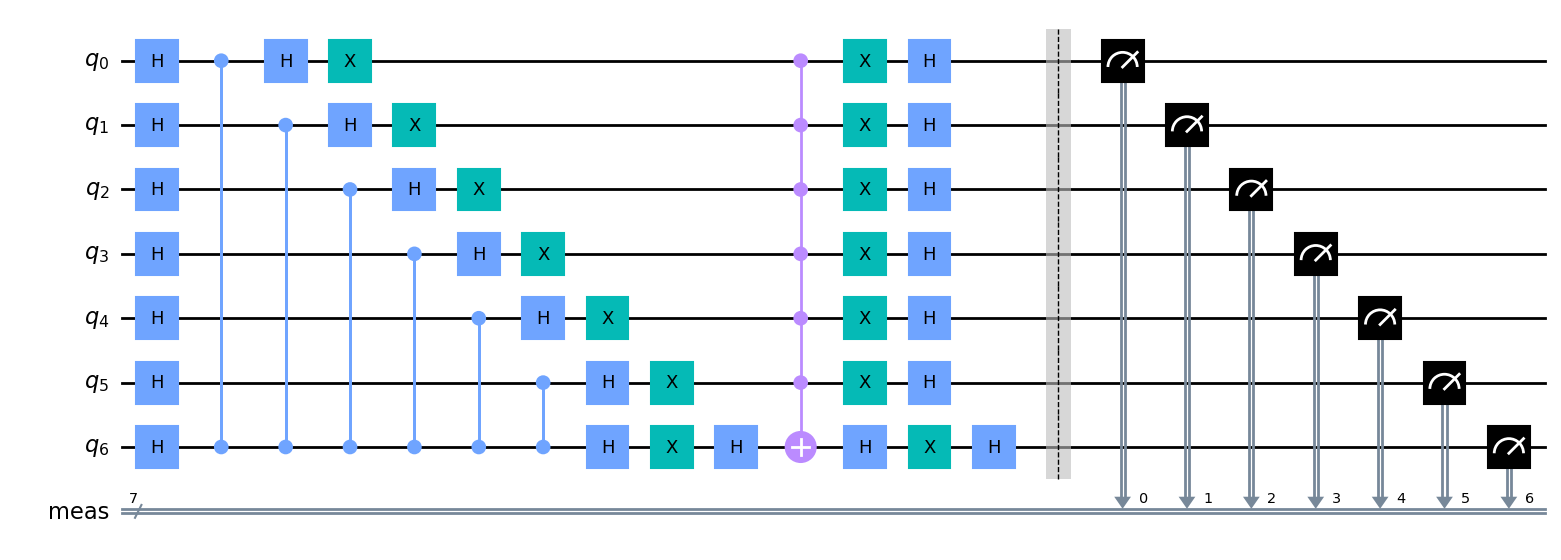

In [5]:
numberOfQubits = 7
rangeOfQubits = np.arange(numberOfQubits)
grover_circuit = QuantumCircuit(numberOfQubits)
AddHGateToAllQubits(grover_circuit,numberOfQubits)
for qubit in range(numberOfQubits-1):
    grover_circuit.cz(qubit,rangeOfQubits[-1])
AddHGateToAllQubits(grover_circuit,numberOfQubits)
AddXGateToAllQubits(grover_circuit,numberOfQubits)
grover_circuit.h(rangeOfQubits[-1])
listOfQubits=[]
for qubit in range(numberOfQubits-1):
    listOfQubits.append(qubit)
grover_circuit.mct(listOfQubits, numberOfQubits-1)
grover_circuit.h(rangeOfQubits[-1])
AddXGateToAllQubits(grover_circuit,numberOfQubits)
AddHGateToAllQubits(grover_circuit,numberOfQubits)
grover_circuit.measure_all()
grover_circuit.draw(output="mpl")

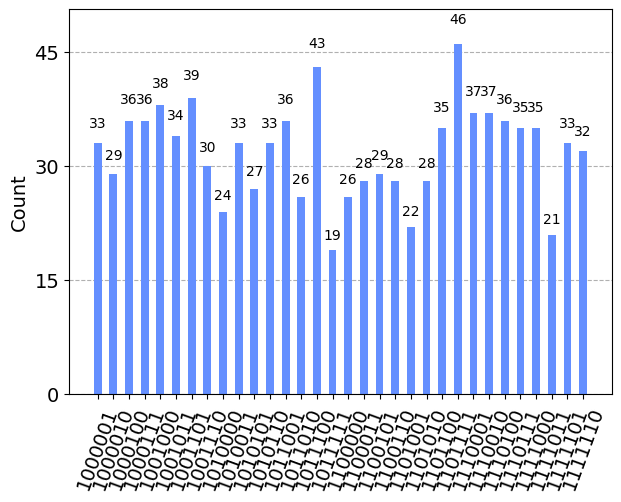

In [6]:
backend=Aer.get_backend("qasm_simulator")
result = execute(grover_circuit, backend=backend, shots=1024).result()
answer = result.get_counts()
plot_histogram(answer)